In [526]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import catboost as cb
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
import xlsxwriter 

import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from sklearn import metrics

from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from catboost import CatBoostClassifier

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from matplotlib import pyplot

In [527]:
train = pd.read_csv("Train.csv")
test= pd.read_csv("Test.csv")
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [528]:
train_data=train.drop(columns=['IsUnderRisk'])
train_label=train['IsUnderRisk']

In [529]:
test_data=test
test_data.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001945B642DD8>,
      dtype=object)

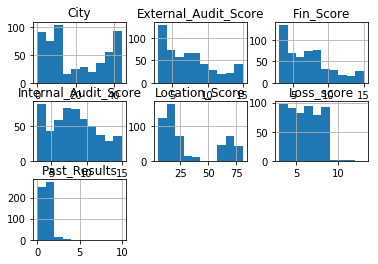

In [530]:
train_data.hist()

In [531]:

train.IsUnderRisk.value_counts()

1    340
0    203
Name: IsUnderRisk, dtype: int64

In [532]:
train_label.value_counts() / train_label.shape[0]

1    0.626151
0    0.373849
Name: IsUnderRisk, dtype: float64

In [533]:
train_data.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000


In [534]:

train.nunique()

City                     43
Location_Score          540
Internal_Audit_Score     13
External_Audit_Score     13
Fin_Score                13
Loss_score               10
Past_Results              7
IsUnderRisk               2
dtype: int64

In [535]:
test.nunique()

City                     34
Location_Score          233
Internal_Audit_Score     13
External_Audit_Score     13
Fin_Score                13
Loss_score                7
Past_Results              5
dtype: int64

In [536]:
#train_data=train_data.drop(columns=['Freq_Of_Word_4','Freq_Of_Word_47'])
#test_data=test_data.drop(columns=['Freq_Of_Word_4','Freq_Of_Word_47'])


In [537]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [538]:
transformer = RobustScaler()
transformer.fit(train_data)
train_data=transformer.transform(train_data)

#transformer = RobustScaler()
#transformer.fit(test_data)
#train_data=transformer.transform(test_data)

In [539]:
scaler = MinMaxScaler()
scaler.fit(train_data)
train_data=(scaler.transform(train_data))

scaler =MinMaxScaler()
scaler.fit(test_data)
test_data=(scaler.transform(test_data))      

In [540]:
train_data1, train_data2, train_label1, train_label2 = train_test_split(train_data, train_label, test_size=0.2,random_state=200)

In [541]:
#kfold = KFold(n_splits=10, random_state=7)
#results = cross_val_score(model, train_data, train_label, cv=kfold)

In [542]:
#count=0;
#for i in (test_data['LengthOFFirstParagraph']):
#    count=count+1;
#    if (i>2): 
#        df2.loc[count-1]=1;
 



In [557]:
#lgbm

Lgb = LGBMClassifier(n_estimators=100, silent=False, random_state =94, max_depth=5,num_leaves=31,objective='binary',metrics ='auc')

In [558]:
fit_model = Lgb.fit(train_data1,train_label1)

In [559]:
pred=fit_model.predict_proba(train_data2)
log_loss(y_true=train_label2, y_pred=pred)


0.3971248393852177

In [546]:
pred1_prob=fit_model.predict_proba(test_data)
print(pred1_prob.shape)

(233, 2)


In [547]:
df2 = pd.DataFrame(pred1_prob,columns=['0','1'])
sub_df = df2
sub_df.to_excel('submission.xlsx', engine='xlsxwriter',index=False)  